# Data-visualisation - Partie 1

### "Un excellent graphique est celui qui donne au spectateur le plus grand nombre d'idées avec le moins d'encre possible, dans le plus petit espace."
Edward R. Tufte, Professeur de statistiques à l’université de Yale

En datascience, il existe plusieurs bibliothèques pour afficher des graphiques :
- matplotlib
- pandas : pandas utilise une version limitée de matplotlib
- seaborn : une version améliorée de matplotlib

Dans le cadre de ce TP nous allons utiliser seaborn. Pourquoi ? L'outil offre plus de choix de graphiques comparé à matplotlib et des designs plus élégants. Toutefois, pour utiliser seaborn, il faudra utiliser (et importer) matplotlib pour afficher nos graphiques. Notez qu'il existe également yellowbrick ou encore bokeh pour gérer les graphiques avec plus d'interactions ou encore plus de type de graphiques.

- [Voir des exemples avec code (en anglais)](https://www.python-graph-gallery.com/all-charts/)

Et pour tester ce nouvel outil, nous allons nous essayer à un autre DataFrame, beaucoup plus petit.

**Cette phase de construction de graphiques (ou data-visualisations / data-viz) s'installe aussi bien dans phase d'exploration ou encore d'évaluation/interprétation de notre démarche de data-scientifique.**

# Seaborn

![logo seaborn](https://seaborn.pydata.org/_static/logo-wide-lightbg.svg)

Lors du tp précédent, nous avons entrevu matplotlib, assurément la bibliothèque la plus utilisée en datascience pour afficher des datavisualisations. Malheureusement matplotlib pèche par ses limitations notamment en terme de choix de graphiques ou encore de design qui sont très austères. Seaborn, nous permet de contrevenir à certains problèmes de matplotlib notamment en rajoutant de nouveaux types de graphiques ou du design.

**Etant basé sur matplotlib, il est indispensable d'importer matplotlib pour utiliser seaborn.** Deuxième remarque, si seul le design vous intéresse, il est possible d'utiliser le style de seaborn dans matplotlib avec le code suivant.

```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
```
Le code ci-dessus, nous permet d'utiliser le design des graphiques de seaborn dans matplotlib. Et ensuite d'utiliser que matplolib pour réaliser ses graphiques.

In [2]:
# On importe seaborn et matplotlib vu que nous allons l'utiliser
import seaborn as sns
import matplotlib.pyplot as plt

# Et on importe toujours pandas et numpy
import pandas as pd
import numpy as np

Quelque soit le type de graphique, le coeur est toujours le même : la données. Sans données, pas de graphique.

# Ligne / courbe (line chart)

![Graphique en ligne](_images/line-chart.png)

Assurément l'un des graphiques les plus simples, la ligne permet soit d'afficher la corrélation entre données (une données est exprimée sur l'axe X, et l'autre sur l'axe Y) ou l'évolution d'une donnée au fil du temps. **Notez que dans les deux cas, les données sur l'axe X doivent être ordonnées pour éviter d'avoir un graphique étrange.** Pensez donc à ordonner vos données avant.
Par ailleurs, notez qu'il est possible d'avoir plusieurs axe Y ou X, mais faites attention à la lisibilité.

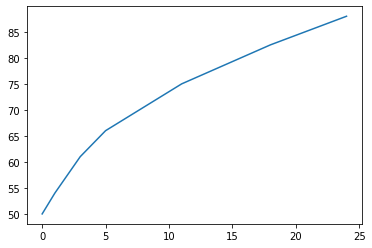

In [3]:
# Dataset
# On utilise numpy pour pouvoir ordonner nos données sur l'axe X
tailles = [50, 54, 61, 66, 69, 72, 75, 82.5, 88]
age = np.sort([1, 3, 5, 7, 9, 11, 18, 24, 0])

# graphique type ligne
# première valeur = x
# deuxième valeur = y
plt.plot(age, tailles)

# Affiche le graphique, équivalent d'un display() pour un DataFrame
# facultatif
plt.show()

C'est bien tout ça, mais sans légende, notre graphique ne sert un peu à rien. Nous allons donc voir deux nouvelles méthodes nous permettant d'afficher un texte pour l'axe des ordonnées et celui des abscisses.

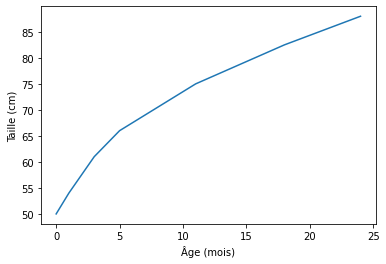

In [4]:
# graphique type ligne
# première valeur = x
# deuxième valeur = y
plt.plot(age, tailles)

# Définit, dans l'ordre, la légende des abscisses et des ordonnées
plt.xlabel("Âge (mois)")
plt.ylabel("Taille (cm)")

# Affiche le graphique, équivalent d'un display() pour un DataFrame
plt.show()

Notre graphique est plus clair, oui, mais il lui manque un titre pour rentre le tout compréhensible

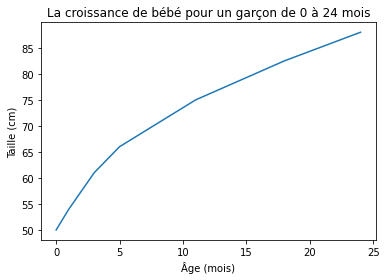

In [5]:
# Définit, dans l'ordre, la légende des abscisses et des ordonnées
plt.xlabel("Âge (mois)")
plt.ylabel("Taille (cm)")

# graphique type ligne
# première valeur = x
# deuxième valeur = y
plt.plot(age, tailles)

# Définit le titre de notre graphique
plt.title(f'La croissance de bébé pour un garçon de {min(age)} à {max(age)} mois')

# Affiche le graphique, équivalent d'un display() pour un DataFrame
plt.show()

Voilà, nous avons notre graphique. 
Avant de l'améliorer un peu en rajoutant les données d'une fille. Remarquez que chaque `plt.show()` définit un graphique, ainsi, dans l'exemple précédent, si vous prenez, par exemple la ligne `plt.title(f'La croissance de bébé pour un garçon de 0 à 24 mois')`, et que vous la mettez après `plt.show()`, ceci affichera un nouveau graphique vide avec juste le titre défini. Essayez.

Continuons.

Notre graphique est bien, mais il nous manque les données des filles pour comparer. Ajoutons-les.

Text(0.5, 1.0, 'La croissance de bébé pour les filles et les garçons de 0 à 24 mois')

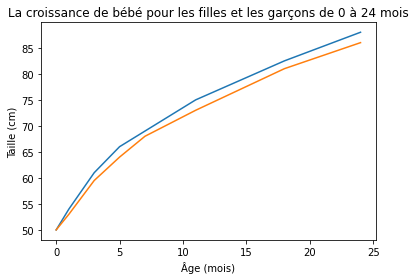

In [7]:
liste_ages = np.sort([0, 1, 3, 5, 7, 9, 11, 18, 24])
garcon_df = pd.DataFrame.from_dict({
    "taille": np.sort([54, 61, 66, 69, 72, 75, 82.5, 88, 50]),
    "age": liste_ages
})

fille_df = pd.DataFrame.from_dict({
    "taille": np.sort([50, 53, 59.5, 64, 68, 70.5, 73, 81, 86]),
    "age": liste_ages
})

# Vu que nous utilisons un dataframe maintenant, nous allons en profiter
# les paramètres x et y peuvent être remplacés par une chaîne de caractères 
# s'il y a le paramètre "data" qui peut être un DataFrame
# les paramètes x et y deviennent donc des clés de notre DataFrame
plt.plot("age", "taille", data=garcon_df)

# graphique type ligne
# première valeur = x
# deuxième valeur = y
plt.plot("age", "taille", data=fille_df)

# Définit, dans l'ordre, la légende des abscisses et des ordonnées
plt.xlabel("Âge (mois)")
plt.ylabel("Taille (cm)")

# Définit le titre de notre graphique
plt.title(f"La croissance de bébé pour les filles et les garçons de {min(liste_ages)} à {max(liste_ages)} mois")

# Affiche le graphique, équivalent d'un display() pour un DataFrame
plt.show()

C'est bien, nous avons notre graphique avec nos deux graphiques, toutefois que représente l'orange ? Que représente le bleu ? Personne ne le sait, utilisons donc la méthode `.legend()`. On va donc l'utiliser sur notre graphique.

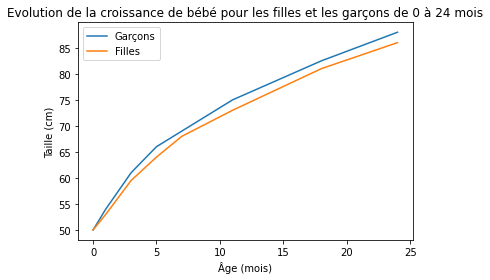

In [8]:
liste_ages = np.sort([0, 1, 3, 5, 7, 9, 11, 18, 24])
garcon_df = pd.DataFrame.from_dict({
    "taille": np.sort([54, 61, 66, 69, 72, 75, 82.5, 88, 50]),
    "age": liste_ages
})

fille_df = pd.DataFrame.from_dict({
    "taille": np.sort([50, 53, 59.5, 64, 68, 70.5, 73, 81, 86]),
    "age": liste_ages
})

# Vu que nous utilisons un dataframe maintenant, nous allons en profiter
# les paramètres x et y peuvent être remplacés par une chaîne de caractères s'il y le paramètre "data", un DataFrame
# les paramètes x et y deviennent donc des clés de notre DataFrame
plt.plot("age", "taille", data=garcon_df)

# graphique type ligne
# première valeur = x
# deuxième valeur = y
plt.plot("age", "taille", data=fille_df)

# Définit, dans l'ordre, la légende des abscisses et des ordonnées
plt.xlabel("Âge (mois)")
plt.ylabel("Taille (cm)")

# Définit le titre de notre graphique
plt.title(f'Evolution de la croissance de bébé pour les filles et les garçons de 0 à 24 mois')

# Définit l'intitulé de nos courbes
# En absence de paramètres, l'intitulé sera la valeur de la clé définie en y dans la fonction plot
plt.legend(['Garçons', 'Filles'])

# Affiche le graphique, équivalent d'un display() pour un DataFrame
plt.show()

Voilà, nous avons notre graphique, néanmoins, nous allons essayer de changer les choses suivantes :
- Taille de notre graphique
- Couleur de notre graphique
- Styliser nos textes 
- Afficher des points pour nos valeurs. Propriété `marker` de la méthode `plot()`

Pour la taille de notre graphique, nous allons devoir utiliser la classe `figure`, cette dernière sert de conteneur à nos graphique. Précédemment, nous n'en avions pas besoin car nous utilisions les paramètres par défaut, l'utilisation de figure étant implicite.

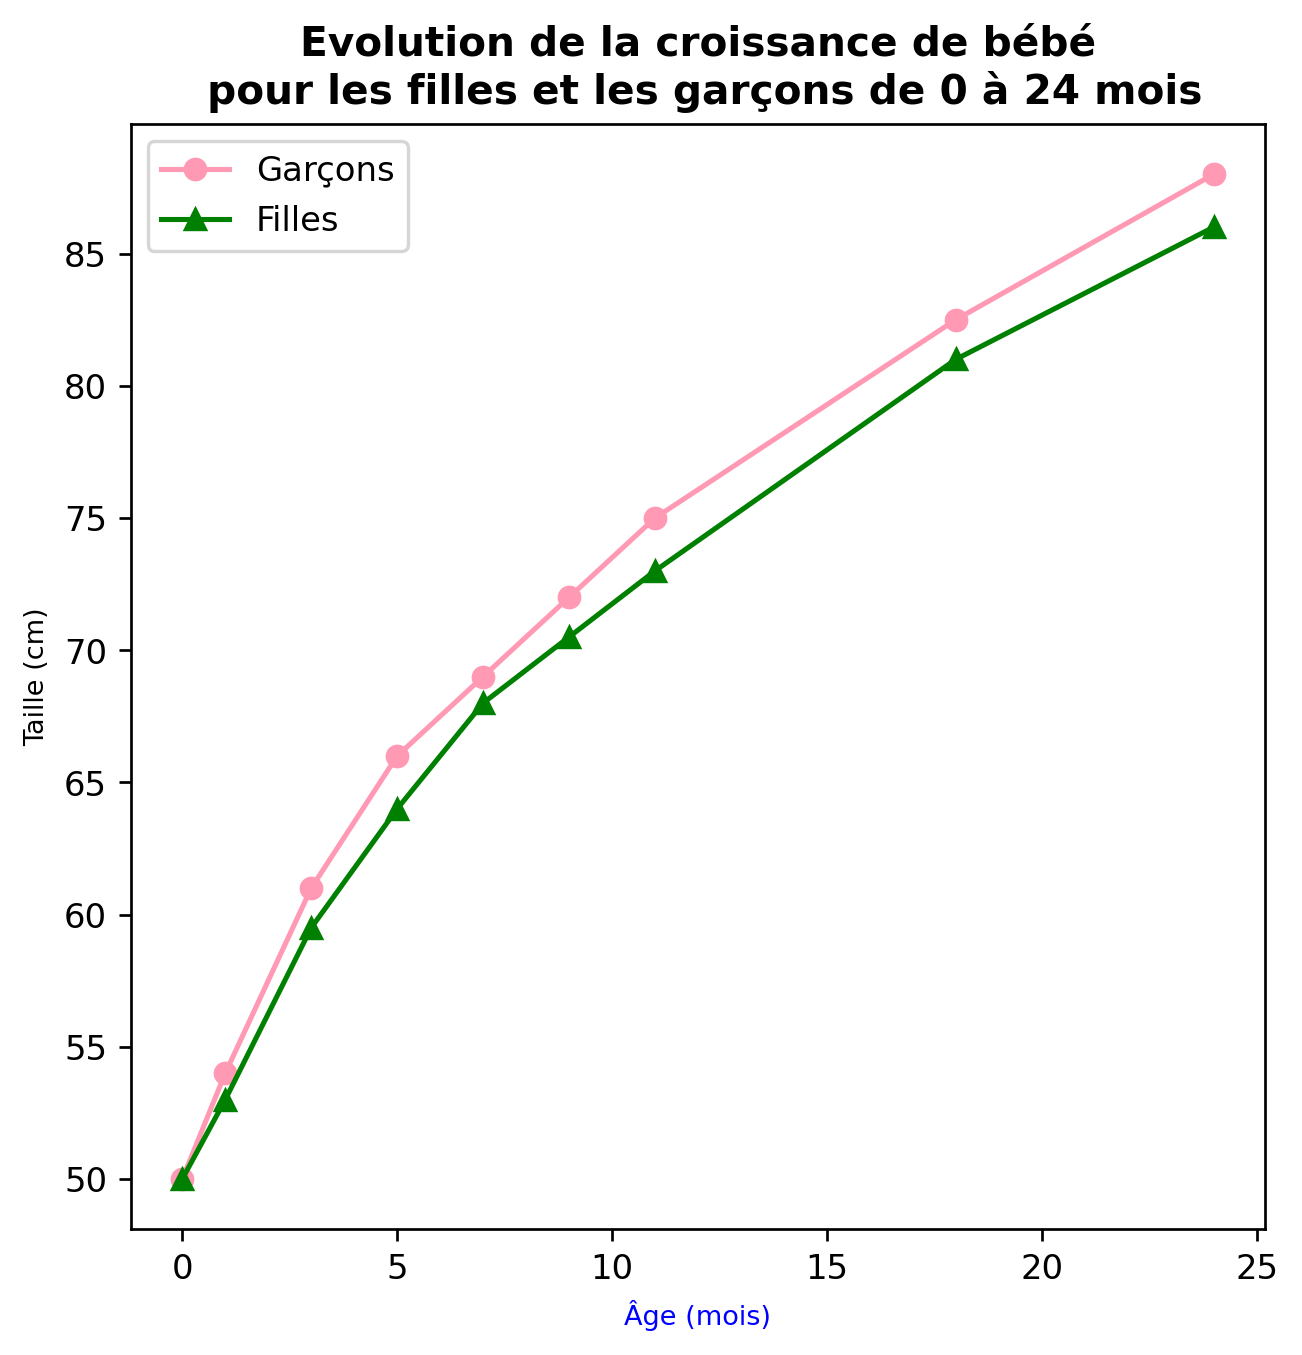

In [41]:
# On définit notre contexte de graphique
# ici nous définissons la taille de notre graphique en pouces (1 in = ~2.52cm)
# dpi défini la densité de pixels de notre image, plus elle sera élevé, plus il sera possible de zoomer
# On zoome en double cliquant sur notre graphique,
# ce comportement peut varier en fonction de la valeur de l'attribut "dpi"
plt.figure(figsize=(6, 6), dpi=244)

plt.plot(
    "age", "taille",
    data=garcon_df, color='#ff99b4',
    # La propriété "marker" nous permet d'afficher un marqueur pour chaque valeur de notre graphique.
    # Il est possible de changer le style du marqueur
    # documentation : https://matplotlib.org/stable/api/markers_api.html
    marker='o',
    label="Garçon"
)
plt.plot("age", "taille", data=fille_df,
         # Documentation gestion des couleurs : https://matplotlib.org/stable/tutorials/colors/colors.html
         color="green",
         marker='^',
         # On définit le nom de la ligne
         label="Fille"
         )

plt.xlabel(
    "Âge (mois)",
    fontsize=8,
    color="blue"
)
plt.ylabel(
    "Taille (cm)",
    fontsize=8
)

plt.title(
    # \n, signifie "retour à la ligne"
    f'Evolution de la croissance de bébé\n pour les filles et les garçons de {min(liste_ages)} à {max(liste_ages)} mois',
    # Notre texte passe en gras
    fontweight="bold"
)

# On affiche la légende de nos courbes
plt.legend()

plt.show()


## Ajouter des repères.
Dernière point sur les courbes, il est possible de rajouter des lignes verticales (ou horizontale) sur nos graphiques grâce aux fonctions `plt.axvline()` et `plt.axhline()` respectivement. Si on reprend notre graphique précédent ça nous donne la chose suivante :

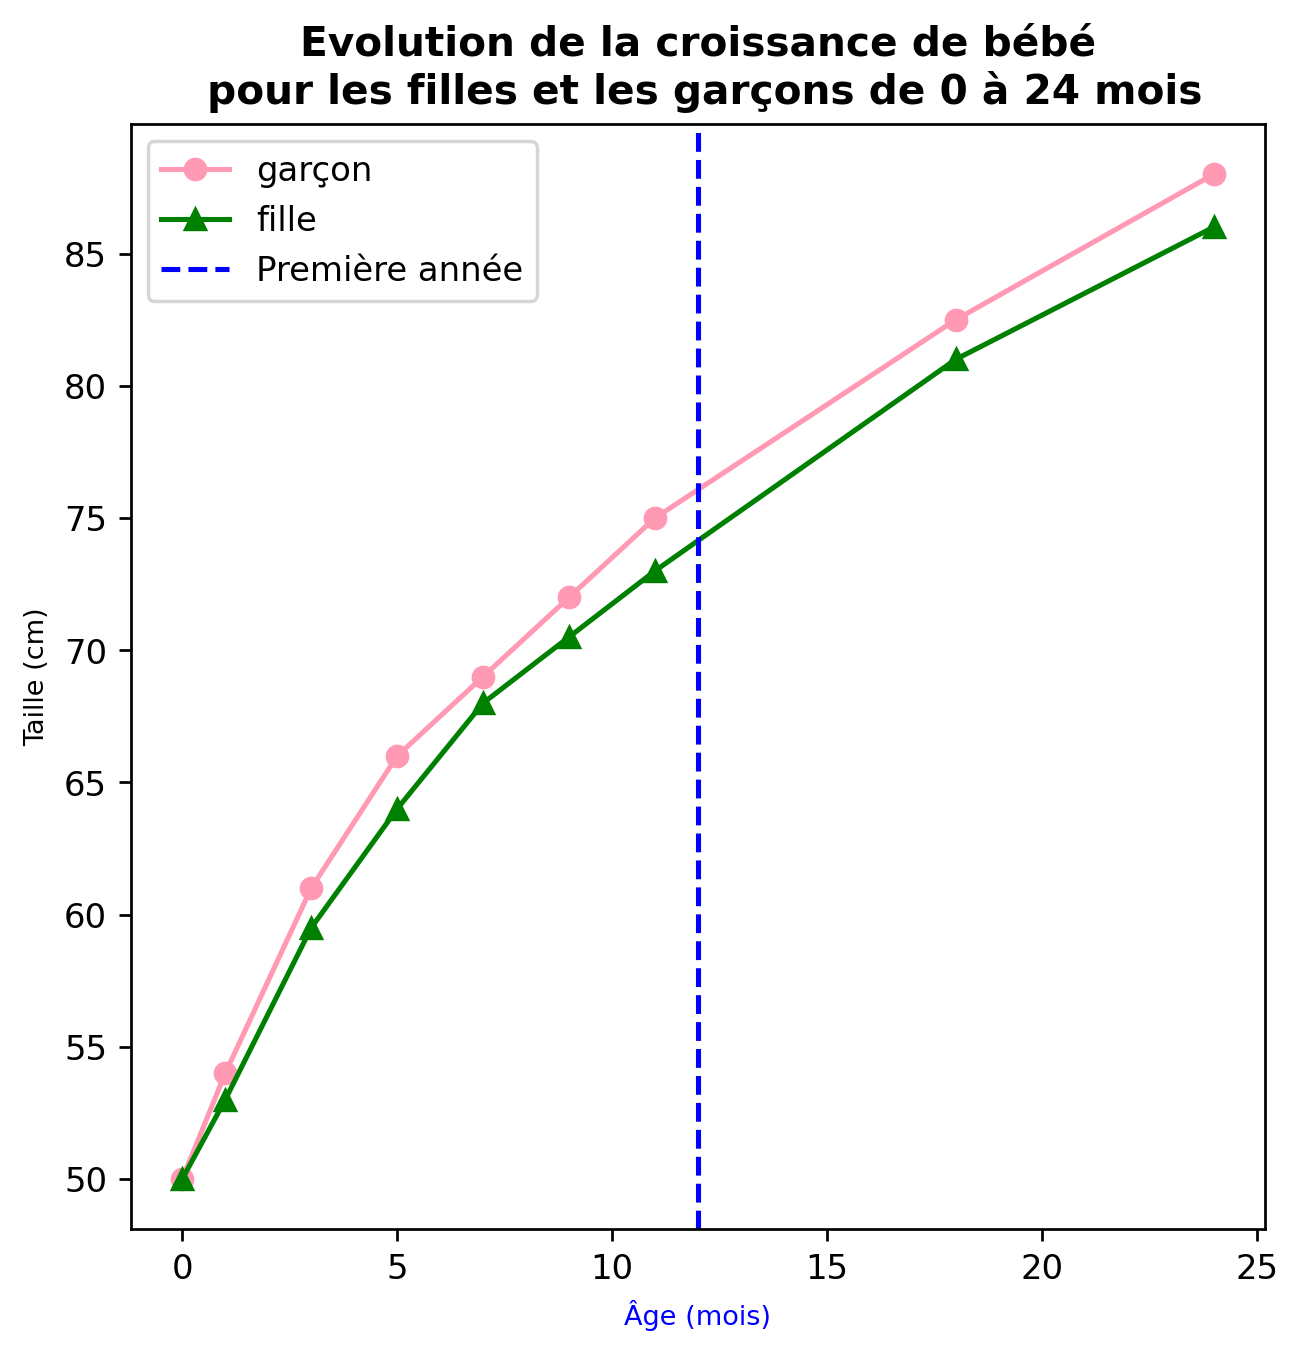

In [23]:
plt.figure(figsize=(6, 6), dpi=244)

plt.plot("age", "taille", data=garcon_df, color='#ff99b4', marker='o', label="Garçon")
plt.plot("age", "taille", data=fille_df, color="green", marker='^', label="Fille")

plt.xlabel("Âge (mois)", fontsize=8, color="blue"
           )
plt.ylabel("Taille (cm)", fontsize=8)

plt.title(
    f'Evolution de la croissance de bébé\n pour les filles et les garçons de {min(liste_ages)} à {max(liste_ages)} mois',
    fontweight="bold"
)

plt.axvline(x=12,color='blue', label="Première année", linestyle="--")

plt.legend()

plt.show()


- [Voir les propriétés possibles pour le texte](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text)


### Un petit peu de vocabulaire

Voici la liste des éléménts graphiques sur lesquels nous pouvons modifier l'apparence / le comportement.

![Anatomy graphique matplotlib](https://raw.githubusercontent.com/DanYellow/cours/main/big-data-s4/travaux-pratiques/numero-7/ressources/_images/anatomy.png)

- [Voir l'anatomie d'un graphique](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

Avant de terminer sur le graphique de type ligne (ou courbe), nous allons appliquer un des styles proposés par seaborn sur notre graphique et afficher la grille.
Pour la grille, il vous suffira de coller le code suivant :
`plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)`
- [Documentation de la méthode "grid"](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)

## Point important

Dans les graphiques en ligne que nous avions, les données étaient séparées en deux DataFrame distincts ce qui nous permettait facilement de générer une courbe par graphique, nous aurons bien plus souvent un DataFrame et les catégories formées par la valeur d'une colonne. C'est pourquoi, si vous êtes dans ce cas, il est préférable d'utiliser seaborn et sa méthode `lineplot`, elle possède un paramètre `hue` permettant d'appliquer une couleur différente pour chaque courbe. Exemple :

```python
sns.lineplot(
        x="abscisse",
        y="ordonnée",
        hue="colonne-de-categorie",
        data=DataFrame
)
```

In [ ]:
# On active le style de seaborn et le thème sombre 
sns.set()
plt.style.use("dark_background")

# Collez ici le graphique de la cellule précédente en dessous et 
# le fragment de code lié à l'affichage de la grille avant le plt.show()

Pour conclure cette partie, sachez qu'il est possible d'entregistrer sous forme de fichier image vos graphiques. Les formats disponibles sont les suivants :
- bitmap : .jpg, .png
- matriciels : .pdf, .eps ou .svg

Il faudra utiliser à la méthode `savefig`. Elle s'utilise la façon suivante.
```python
plt.savefig('nom-du-fichier') # par défault le fichier est au format ".png", mais on peut rajouter une des extensions listée plus haut. Exemple :

# Sauvegarde le fichier au format .eps
plt.savefig('nom-du-fichier.eps')
```

Il est possible de passer des paramètres à la méthode pour influencer les paramètres suivants :
- La densité de pixels de l'image
- La couleur de l'arrière-plan de l'image

- [Voir documentation de la méthode](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

**Essayez sur le graphique plus haut.**
- Note : Pour les utilisateurs de Google colab, veuillez regarder la cellule en-dessous avant.
- Note 2 : La fonction doit être appelée avant `plt.show()`, si vous l'avez dans le code

- [Voir documentation officielle de la méthode .savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.savefig)

# Pour les utilisateurs de Google colab

Petit apparté pour les utilisateurs de google colab. Pour utiliser la méthode `plt.savefig()`, il faudra rajouter quelques lignes de codes supplémentaires pour pouvoir **télécharger** un fichier, les voici.

```python
from google.colab import files
nom_fichier = "abc.png"
plt.savefig(nom_fichier)
files.download(nom_fichier) 
```

- [Voir plus d'informations sur l'enregistrement de fichiers depuis google colab](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=hauvGV4hV-Mh&line=4&uniqifier=1)

Porchaine partie : découverte d'autres types de graphiques et bien plus encore.